<a href="https://colab.research.google.com/github/rishabh9898/NLP/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
import matplotlib.pyplot as plt
from textblob import TextBlob
from google.colab import files
from wordcloud import WordCloud, STOPWORDS
from string import digits

In [ ]:
pip install wordcloud

In [ ]:
uploaded = files.upload()

In [13]:
lemma_tweets = []
tweets = []
with open('tweets.csv',encoding = 'utf-8') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        tweets.append(row['text'])

In [ ]:
temp = [len(element) for element in tweets]
len_strings = 0 if len(temp) == 0 else (float(sum(temp)) / len(temp))
print("The Average length of Sentence in list is : " + str(len_strings))

In [15]:
for i in range(len(tweets)):
    tweets[i] = tweets[i].lower()

In [ ]:
pip install emoji

In [18]:
import emoji
def give_free_text(text):
    text =emoji.get_emoji_regexp().sub("", text)
    # removes all emojis
    text = re.sub(r'http\S+', '', text) 
    # Removes all hyperlinks
    text = re.sub('@', '', text)
    # Removes all @ 
    return text

for i in range(len(tweets)):
    tweets[i] = give_free_text(tweets[i])


In [19]:
def give_punct_free_text(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+") 
    no_punct = tokenizer.tokenize(text)
    return no_punct

for i in range(len(tweets)):
    tweets[i] = give_punct_free_text(tweets[i])

In [ ]:
nltk.download('stopwords')

In [23]:
stop_words = set(stopwords.words("english"))

def give_stop_free_text(text):
    filtered_sentence = [] 
    count = 0 
    for w in text: 
        if w not in stop_words:
            count+=1 
            filtered_sentence.append(w)
            return(filtered_sentence[count-1])
for i in range(len(tweets)):
  tweets[i] = give_stop_free_text(tweets[i])

In [40]:
def give_nu_free_text(text):
    remove_digits = str.maketrans('', '', digits)
    res = text.translate(remove_digits)
    return res

for i in range(len(tweets)):
    tweets[i] = give_num_free_text(str(tweets[i]))
    

In [42]:
all_tweets = []
all_tweets = nltk.FreqDist(tweets)

In [69]:
common = all_tweets.most_common(25)

In [59]:
res = list(map(list, common))

In [67]:

word_common = [item for sublist in res for item in sublist]

In [83]:
with open('listfile.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % place for place in tweets)

In [84]:
text_tweets = open('listfile.txt', mode ='r',encoding='utf-8').read()

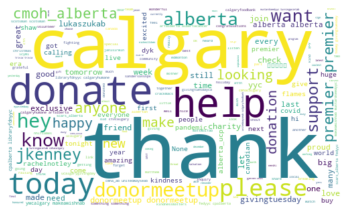

In [85]:
wc = WordCloud(background_color = 'white',width = 500 , height = 300, random_state= 21, max_font_size=120).generate(text_tweets)
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()